#creating a model , making a stack of layers.

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation = 'relu', input_shape= (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832 (3.25 KB)

 Trainable params: 832 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

Breakdown:

Conv2D = A filter that looks at small parts of the image.

32 = It learns 32 different patterns (like edges, curves, shapes).

(5,5) = Each pattern is a 5×5 window scanning the image.

activation='relu' = Helps the model learn complicated shapes.

input_shape=(28,28,1) =

Image height = 28 pixels

Image width = 28 pixels

1 channel = grayscale image

👉 In simple terms:
This layer looks at the image in small 5×5 sections and learns 32 different features.

2ND LAYER : pOOLING : MaxPooling takes each 2×2 block of the image and keeps only the biggest value.

This reduces image size → makes model faster and prevents overfitting.

👉 In simple words:
This layer shrinks the image while keeping important information.

Description of parameters¶
The number of parameters of the conv2D layer corresponds to the weight matrix W of 5×5 and a b bias for each of the filters is 832 parameters (32 × (25 + 1)).

Max-pooling does not require parameters since it is a mathematical operation to find the maximum.



In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation = 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (5,5), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,096 (203.50 KB)

 Trainable params: 52,096 (203.50 KB)

 Non-trainable params: 0 (0.00 B)

Description of parameters
In this case, the size of the resulting second convolution layer is 8×8 since we now start from an input space of 12×12×32 and a sliding window of 5×5, taking into account that it has a stride of 1.

The number of parameters 51,264 corresponds to the fact that the second layer will have 64 filters (as we have specified in the argument), with 801 parameters each (1 corresponds to the bias, and a W matrix of 5×5 for each of the 32 entries). That means ((5 × 5 × 32) +1) × 64 = 51264.

The next step, now that we have 64 4x4 filters, is to add a densely connected layer, which will serve to feed a final layer of softmax activation function with the following code snippet:
model.add(layers.Dense(10, activation='softmax'))

In this example, we have to adjust the tensors to the input of the dense layer like the softmax, which is a 1D tensor, while the output of the previous one is a 3D tensor. So, we will first flatten the 3D tensor to one of 1D.

Our output (4,4,64) must be flattened to a vector of (1024) before applying the Softmax with the following code snippet:

model.add(layers.Flatten())

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32,(5,5),activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,346 (243.54 KB)

 Trainable params: 62,346 (243.54 KB)

 Non-trainable params: 0 (0.00 B)

## Training and evaluation of the model ¶
Back to Table of Contents

Now that we have built our CNN model, its time to train it.

It means to adjust the parameters of all the convolutional layers.

Training can be done as follows:

In [ ]:
from keras.datasets import mnist
mnist

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/mnist/__init__.py'>

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255


test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


batch_size = 100
epochs = 10


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])



model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 56s 92ms/step - accuracy: 0.6209 - loss: 1.4552
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 79s 88ms/step - accuracy: 0.9160 - loss: 0.2854
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.9401 - loss: 0.2037
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.9549 - loss: 0.1587
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.9642 - loss: 0.1264
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step - accuracy: 0.9675 - loss: 0.1128
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step - accuracy: 0.9707 - loss: 0.1027
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step - accuracy: 0.9733 - loss: 0.0923
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.9748 - loss: 0.0843
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step - accuracy: 0.9761 - loss: 0.0811


#EVALUATE MODEL

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9766 - loss: 0.0794
Test loss: 0.06666630506515503
Test accuracy: 0.9804999828338623


# YOLO

In [ ]:
#installing Ultralytics
%pip install ultralytics

import ultralytics
#to check which version
ultralytics.checks()

#importing YOLO from ultralytics
from ultralytics import YOLO

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.3/107.7 GB disk)


## YOLO V3

In [ ]:
model = YOLO("yolov3u.pt")

#for detection.
result = model.predict("/content/p1.png",  save=True)


image 1/1 /content/p1.png: 448x640 1 cake, 1 chair, 1 couch, 2 potted plants, 2 dining tables, 1 tv, 1 laptop, 1 remote, 1 microwave, 1 oven, 1 sink, 4 books, 2 clocks, 2 vases, 1 scissors, 1 teddy bear, 8880.4ms
Speed: 5.8ms preprocess, 8880.4ms inference, 11.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict5


In [ ]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

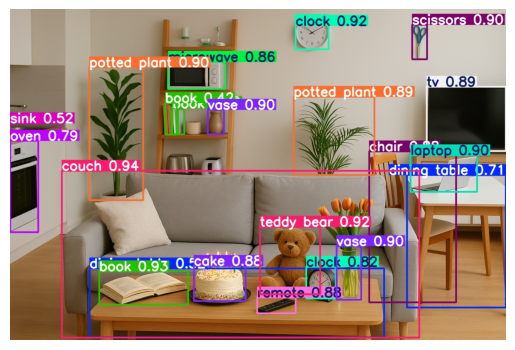

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

output_path = "/content/runs/detect/predict5/p1.jpg"

img = Image.open(output_path)
plt.imshow(img)
plt.axis("off")
plt.show()

## YOLO V8

In [ ]:
model = YOLO("yolov8n.pt")

#for detection.
result = model.predict("/content/p1.png",  save=True)


image 1/1 /content/p1.png: 640x640 3 persons, 1 wine glass, 250.0ms
Speed: 5.9ms preprocess, 250.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict3


In [ ]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [ ]:
!ls /content/runs/detect/

predict  predict2  predict3


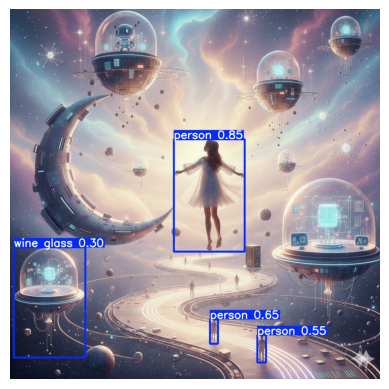

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

output_path = "/content/runs/detect/predict3/p1.jpg"

img = Image.open(output_path)
plt.imshow(img)
plt.axis("off")
plt.show()

## YOLO V12

In [ ]:
model = YOLO("yolo12n.pt")

#for detection.
result = model.predict("/content/p1.png",  save=True)


image 1/1 /content/p1.png: 640x640 4 persons, 450.5ms
Speed: 9.8ms preprocess, 450.5ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


In [ ]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

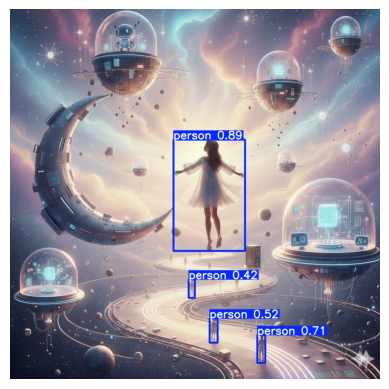

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

output_path = "/content/runs/detect/predict2/p1.jpg"

img = Image.open(output_path)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
%pip install openai

In [ ]:
from google.colab import userdata

    # Access the secret by its name
openai_api_key = userdata.get('OPENAI_API_KEY')



In [ ]:
from openai import OpenAI

client = OpenAI(api_key=openai_api_key )

audio_file_path = "audio.mp3"

with open(audio_file_path, "rb") as audio_file:
    transcription = client.audio.transcriptions.create(
        model="whisper-1",         # Whisper speech-to-text model
        file=audio_file
    )

print("Transcription:")
print(transcription.text)


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

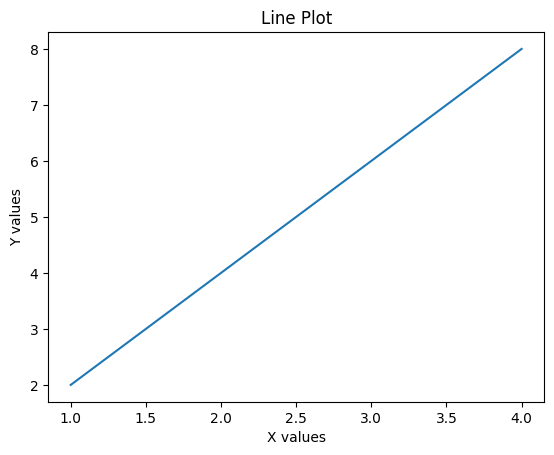

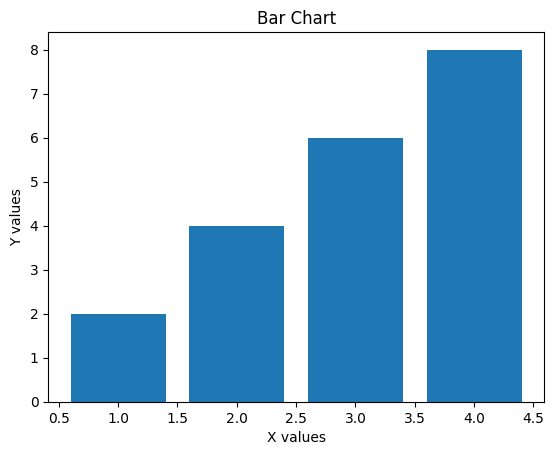

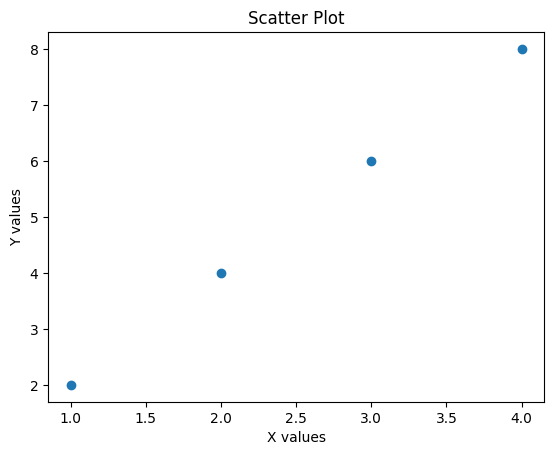

In [ ]:
import matplotlib.pyplot as plt

# Small predefined dataset
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

# ---------------- Line Plot ----------------
plt.figure()
plt.plot(x, y)
plt.title("Line Plot")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

# ---------------- Bar Chart ----------------
plt.figure()
plt.bar(x, y)
plt.title("Bar Chart")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

# ---------------- Scatter Plot ----------------
plt.figure()
plt.scatter(x, y)
plt.title("Scatter Plot")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,586 (721.04 KB)

 Trainable params: 184,586 (721.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8774 - loss: 0.4144
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.9835 - loss: 0.0533
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step - accuracy: 0.9888 - loss: 0.0354
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.9924 - loss: 0.0245
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step - accuracy: 0.9935 - loss: 0.0194
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step - accuracy: 0.9956 - loss: 0.0132
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.9965 - loss: 0.0114
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step - accuracy: 0.9971 - loss: 0.0101
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.9977 - loss: 0.0078
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 51s 84ms/step - accuracy: 0.9979 - loss: 0.0066
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9901 - loss: 0.0371
Test loss: 0.029085729271173477
Test accura

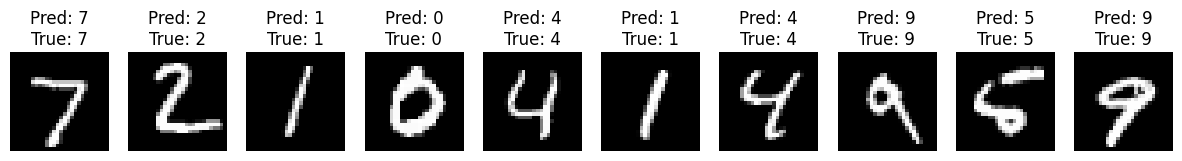

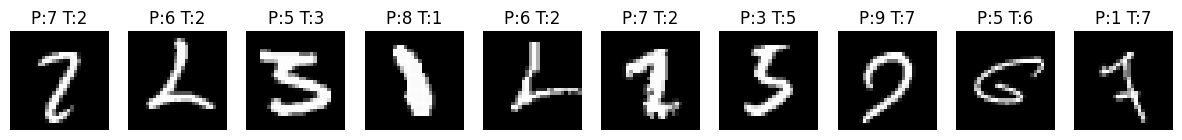

In [ ]:
# =========================
# Imports
# =========================
import numpy as np
import matplotlib.pyplot as plt

from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical

# =========================
# Load MNIST data
# =========================
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# =========================
# Preprocess data
# =========================
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# =========================
# Build CNN model
# =========================
model = models.Sequential()

model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

# =========================
# Compile model
# =========================
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# =========================
# Train model
# =========================
model.fit(
    train_images,
    train_labels,
    batch_size=100,
    epochs=10,
    verbose=1
)

# =========================
# Evaluate model
# =========================
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

# =========================
# Make predictions
# =========================
predictions = model.predict(test_images)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# =========================
# Display sample predictions
# =========================
num_samples = 10
plt.figure(figsize=(15, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')

plt.show()

# =========================
# Display WRONG predictions (optional)
# =========================
wrong_indices = np.where(predicted_labels != true_labels)[0]

plt.figure(figsize=(15, 4))
for i in range(10):
    idx = wrong_indices[i]
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"P:{predicted_labels[idx]} T:{true_labels[idx]}")
    plt.axis('off')

plt.show()
